# ML on House Pricing
## Yutao Chen
## 04/15/2019

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from scipy.stats import norm


## Preapre the data


In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
SalePrice = train['SalePrice']  # Separate the column "SalePrice"
train_len = len(train) # the length og training data
print("The dimensions of training data is: {}".format(train.shape))
print("The dimensions of testing data is: {}".format(test.shape))


The dimensions of training data is: (1460, 81)
The dimensions of testing data is: (1459, 80)


In [3]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
all_data = pd.concat(objs=[train, test], axis=0, sort=False).reset_index(drop=True)  # combine the data
all_data = all_data.fillna(np.nan) # fill the all different kinds of missing data with NaN


In [6]:
all_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
all_data.tail()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,...,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,...,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,...,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,...,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,...,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [8]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

## Choose features (Numerical)
In this part, we deal eoth the numerical data. We first see how these data are related to the sal price then we only keep the most related few as training data

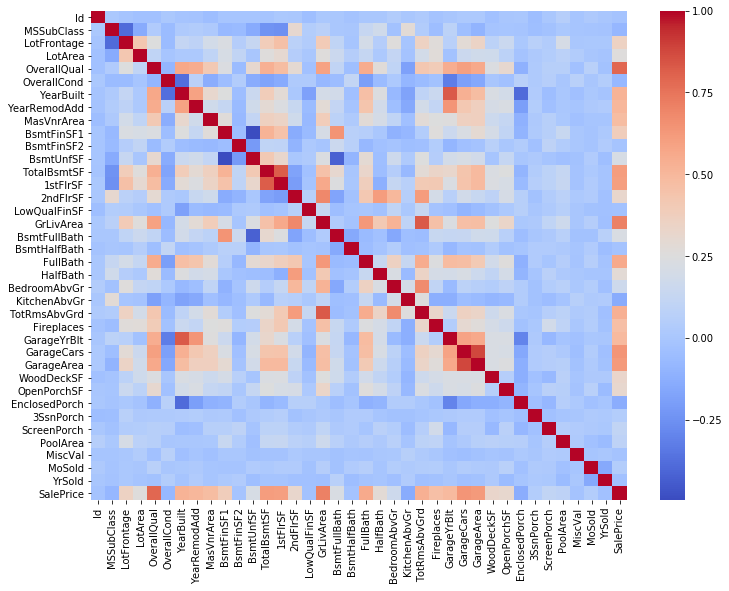

In [9]:
f, ax = plt.subplots(figsize=(12, 9))
g = sns.heatmap(train.corr(),cmap="coolwarm")


We can see from the pllt that the following data are closely related to sale price compared to others.  

They are:    
"SalePrice", "OverallQual", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "GarageCars", "GarageArea", "YearBuilt", "FullBath", "TotRmsAbvGrd","LotFrontage", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1","Fireplaces","GarageYrBlt"

So we zoom in the plot to conduct a second choose.

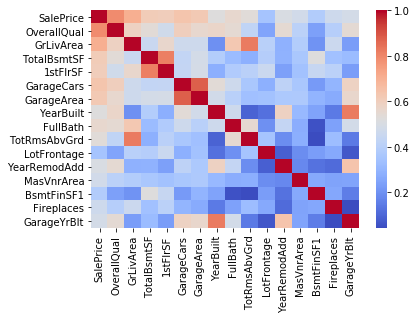

In [10]:
g = sns.heatmap(train[["SalePrice", "OverallQual", "GrLivArea", 
                       "TotalBsmtSF", "1stFlrSF", "GarageCars", 
                       "GarageArea", "YearBuilt", "FullBath", 
                       "TotRmsAbvGrd","LotFrontage", "YearRemodAdd", 
                       "MasVnrArea", "BsmtFinSF1","Fireplaces","GarageYrBlt"]].corr(),
                cmap="coolwarm")


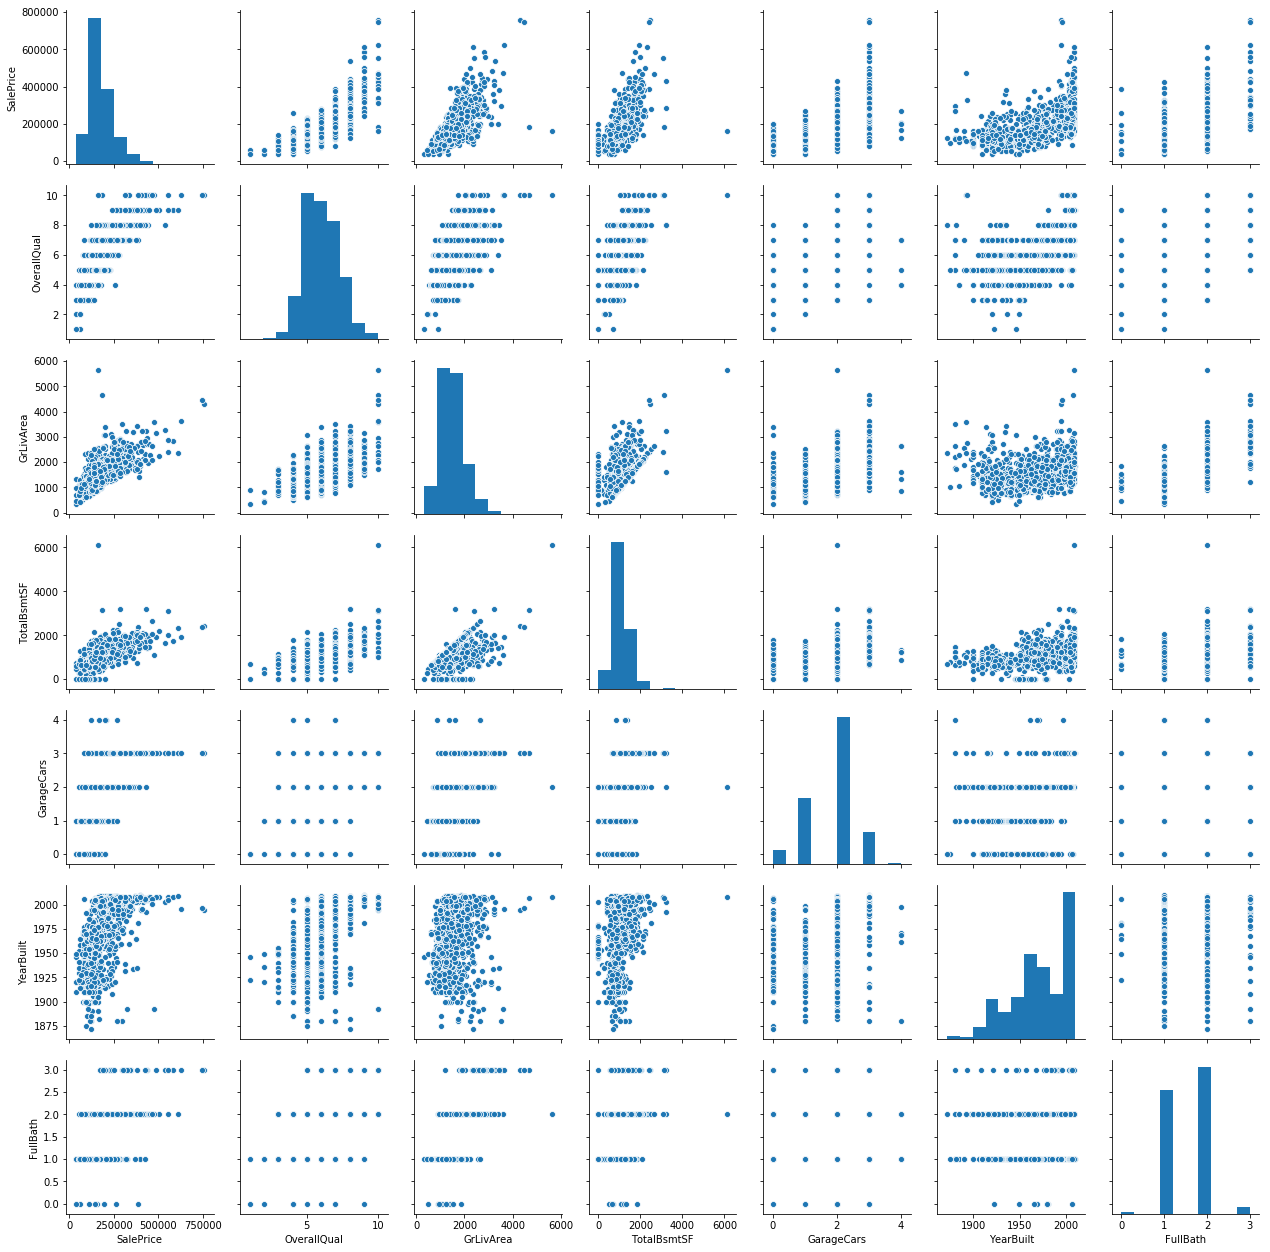

In [11]:
g = sns.pairplot(train[["SalePrice", "OverallQual", "GrLivArea", "TotalBsmtSF", 
                        "GarageCars", "YearBuilt", "FullBath", ]], height = 2.5)


The final choice are made as follows: "OverallQual", "GrLivArea", "TotalBsmSF", "GarageCars", "FullBath", "YearBuilt"  
Other abandoned data are either noe so related to sale price or highly related to one of the chosen data

## Deal with chosen features (Numerical)

In [12]:
train[["SalePrice", "OverallQual", "GrLivArea", "TotalBsmtSF", 
       "GarageCars", "YearBuilt", "FullBath", ]].isnull().sum().sort_values(ascending=False)


FullBath       0
YearBuilt      0
GarageCars     0
TotalBsmtSF    0
GrLivArea      0
OverallQual    0
SalePrice      0
dtype: int64

There is no missing data in these features, so we don't need to do anything!

In [13]:
selected_feature = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "YearBuilt", "FullBath"]


## Choose features (Categorical)

In [14]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_count = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_count.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We simply abandone the features that have more than 15% missing data

The features begin with "Garage" are highly related to the feature "GarageCars" which is already considered in numerical feature. So we simple abandone these features. So as features begin with "Bsmt" and "MasVnr"

Thus the only feature we care and with missing data is "Electrical"

In [15]:
all_data = all_data.drop((missing_count[missing_count['Total'] > 1]).index,1)
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0]) # since there is only one missing, we fill it with omst common data


## Generate new data set (only have chosen features)

In [16]:
new_data = all_data.select_dtypes(include='object')  # Categorical features
for f in selected_feature:
    new_data[f] = all_data[f]  # Numerical features
new_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 34 columns):
MSZoning         2915 non-null object
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
ExterQual        2919 non-null object
ExterCond        2919 non-null object
Foundation       2919 non-null object
Heating          2919 non-null object
HeatingQC        2919 non-null object
CentralAir       2919 non-null object
Electrical       2919 non-null object
KitchenQual      29

In [17]:
new_data.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt,FullBath
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal,7,1710,856.0,2.0,2003,2
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal,6,1262,1262.0,2.0,1976,2
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal,7,1786,920.0,2.0,2001,2
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml,7,1717,756.0,3.0,1915,1
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal,8,2198,1145.0,3.0,2000,2


In [18]:
new_data.tail()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt,FullBath
2914,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,TA,TA,CBlock,GasA,Gd,Y,SBrkr,TA,Typ,Y,WD,Normal,4,1092,546.0,0.0,1970,1
2915,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,TA,TA,CBlock,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Abnorml,4,1092,546.0,1.0,1970,1
2916,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Abnorml,5,1224,1224.0,2.0,1960,1
2917,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,TA,TA,PConc,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal,5,970,912.0,0.0,1992,1
2918,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,TA,TA,PConc,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal,7,2000,996.0,3.0,1993,2


In [19]:
new_data.isnull().sum().sort_values(ascending=False)


MSZoning         4
Functional       2
Utilities        2
SaleType         1
Exterior2nd      1
KitchenQual      1
TotalBsmtSF      1
GarageCars       1
Exterior1st      1
LandContour      0
LotShape         0
Street           0
RoofStyle        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
FullBath         0
RoofMatl         0
YearBuilt        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
PavedDrive       0
SaleCondition    0
OverallQual      0
GrLivArea        0
ExterQual        0
dtype: int64

There are still some missing data in the test set. So we need to fill them.

In [20]:
new_data['MSZoning'] = new_data['MSZoning'].fillna(new_data['MSZoning'].mode()[0])
new_data['Utilities'] = new_data['Utilities'].fillna(new_data['Utilities'].mode()[0])
new_data['Functional'] = new_data['Functional'].fillna(new_data['Functional'].mode()[0])
new_data['TotalBsmtSF'] = new_data['TotalBsmtSF'].fillna(0)
new_data['Exterior1st'] = new_data['Exterior1st'].fillna(new_data['Exterior1st'].mode()[0])
new_data['Exterior2nd'] = new_data['Exterior2nd'].fillna(new_data['Exterior1st'].mode()[0])
new_data['GarageCars'] = new_data['GarageCars'].fillna(0.0)
new_data['SaleType'] = new_data['SaleType'].fillna(new_data['SaleType'].mode()[0])
new_data['KitchenQual'] = new_data['KitchenQual'].fillna(new_data['KitchenQual'].mode()[0])


In [21]:
new_data.isnull().sum().sort_values(ascending=False)


FullBath         0
Condition1       0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition2       0
Neighborhood     0
YearBuilt        0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
PavedDrive       0
SaleType         0
SaleCondition    0
OverallQual      0
GrLivArea        0
TotalBsmtSF      0
GarageCars       0
MSZoning         0
dtype: int64

No missing data

In [22]:
for col in new_data.dtypes[new_data.dtypes == 'object'].index:
    new_data[col] = new_data[col].astype('category')  # converting to a category dtype
    new_data[col] = new_data[col].cat.codes
print(new_data.shape)


(2919, 34)


In [24]:
new_data.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt,FullBath
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,1,0,1,4,2,6,2,8,4,7,1710,856.0,2.0,2003,2
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,1,0,1,4,3,6,2,8,4,6,1262,1262.0,2.0,1976,2
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,1,0,1,4,2,6,2,8,4,7,1786,920.0,2.0,2001,2
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,1,2,1,4,2,6,2,8,0,7,1717,756.0,3.0,1915,1
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,1,0,1,4,2,6,2,8,4,8,2198,1145.0,3.0,2000,2


Normalize the data

In [25]:
new_data=(new_data-new_data.mean())/new_data.std()


In [26]:
new_data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt,FullBath
0,-0.042149,0.064238,0.746541,0.316616,-0.018509,0.588455,-0.216223,-1.248262,-0.046250,-0.009815,-0.419102,1.031544,-0.482843,-0.116903,0.742660,0.750206,-0.755664,0.376396,0.834475,-0.103188,-0.880174,0.268244,0.300563,-0.415925,0.256762,0.314976,0.319257,0.204932,0.646073,0.413476,-0.443002,0.306987,1.046078,0.781232
1,-0.042149,0.064238,0.746541,0.316616,-0.018509,-0.658061,-0.216223,1.940732,-1.190353,-0.009815,-0.419102,-0.536725,-0.482843,-0.116903,-0.507708,-0.657877,0.668341,0.376396,-0.540925,-0.103188,-0.880174,0.268244,0.300563,0.782579,0.256762,0.314976,0.319257,0.204932,-0.063174,-0.471810,0.477381,0.306987,0.154737,0.781232
2,-0.042149,0.064238,-1.381539,0.316616,-0.018509,0.588455,-0.216223,-1.248262,-0.046250,-0.009815,-0.419102,1.031544,-0.482843,-0.116903,0.742660,0.750206,-0.755664,0.376396,0.834475,-0.103188,-0.880174,0.268244,0.300563,-0.415925,0.256762,0.314976,0.319257,0.204932,0.646073,0.563659,-0.297917,0.306987,0.980053,0.781232
3,-0.042149,0.064238,-1.381539,0.316616,-0.018509,-1.904577,-0.216223,-1.080420,-0.046250,-0.009815,-0.419102,1.031544,-0.482843,-0.116903,1.055252,1.313439,0.668341,0.376396,-1.916324,-0.103188,0.267571,0.268244,0.300563,-0.415925,0.256762,0.314976,0.319257,-3.504814,0.646073,0.427309,-0.669697,1.618986,-1.859033,-1.027187
4,-0.042149,0.064238,-1.381539,0.316616,-0.018509,-0.658061,-0.216223,0.430156,-0.046250,-0.009815,-0.419102,1.031544,-0.482843,-0.116903,0.742660,0.750206,-0.755664,0.376396,0.834475,-0.103188,-0.880174,0.268244,0.300563,-0.415925,0.256762,0.314976,0.319257,0.204932,1.355319,1.377806,0.212148,1.618986,0.947040,0.781232


## SalePrice Analysis

In [27]:
SalePrice.describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

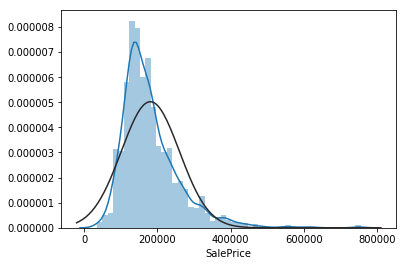

In [28]:
g = sns.distplot(SalePrice, fit=norm)


In [29]:
print('Skewness : {}'.format(SalePrice.skew()))
print('Kurtosis : {}'.format(SalePrice.kurt()))


Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


A more normal distributed data will be beneficial to our training

In [30]:
SalePrice = np.log(SalePrice)


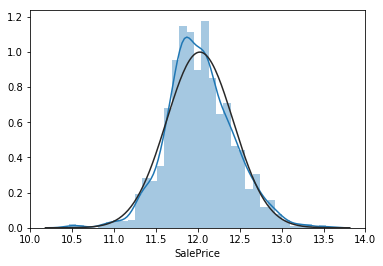

In [31]:
g = sns.distplot(SalePrice, fit=norm);


Now the data is more "Normal" than the original data

## Data for Training
Here we prepare the data for training and predicting

In [32]:
train_info = new_data[:train_len]
train_label = SalePrice
train = pd.concat([train_info, train_label], axis=1, sort=False)

test_info = new_data[train_len:]


In [33]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor


In [34]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train_info.values, train_label.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


Define models

In [35]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.8, random_state=3))

KR = KernelRidge(alpha=6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05, max_depth=4, 
                                   max_features='sqrt',min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber',random_state =5)

XGBoost = XGBRegressor(n_estimators=2000, learning_rate=0.05, random_state =7)


See the score for different models

In [36]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(XGBoost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 0.1613 (0.0224)

ElasticNet score: 0.1614 (0.0224)

Kernel Ridge score: 0.1522 (0.0205)

Gradient Boosting score: 0.1393 (0.0110)

Xgboost score: 0.1431 (0.0111)



# Submission

I choose the GBoost as final model

In [37]:
GBoost.fit(train_info, train_label)
res = GBoost.predict(test_info)


Since we take the natural log of the "Saleprice", we need to undo that.

In [38]:
res = np.expm1(res)
print(res)

[115744.93729541 164999.02188913 172152.91060568 ... 138598.46662492
 119238.08162685 226749.63669285]


In [39]:
prediction = pd.DataFrame(res, columns=['SalePrice'])
result = pd.concat([test['Id'], prediction], axis=1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [40]:
result.to_csv('./submission.csv', index=False)